In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification




In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


## Veri Setinin Oluşturulması ve Model Eğitimi

In [11]:

X, y = make_classification(
    n_samples=1000, 
    n_features=2,  
    n_classes=2,
    n_clusters_per_class=1,
    n_redundant=0,
    random_state=42
)

# Veri setini eğitim ve test olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğitme
nb = GaussianNB()
nb.fit(X_train, y_train)

# Tahminleri yapma
y_pred = nb.predict(X_test)

In [27]:
pd.DataFrame(X_train)

,0,1
0,1.469818,0.528799
1,0.694140,-1.068764
2,1.752475,0.197683
3,-1.342237,-2.242623
4,1.644855,-0.591426
...,...,...
795,1.574242,-0.714525
796,1.378786,-0.591663
797,1.086220,-0.748067
798,1.649892,-0.718854


In [22]:
import pandas as pd
df = pd.DataFrame(X)
print("X verilerinin istatistiksel özeti:")
df.describe()

X verilerinin istatistiksel özeti:


,0,1
count,1000.000000,1000.000000
mean,1.025840,-0.012693
std,1.071457,1.225378
min,-2.472718,-2.850971
25%,0.307209,-0.984268
50%,1.023750,-0.102945
75%,1.724713,0.973550
max,4.138715,3.342864


In [23]:
pd.DataFrame(y).describe()

,0
count,1000.000000
mean,0.499000
std,0.500249
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## Sınıflandırma Sonuçlarının Görselleştirilmesi

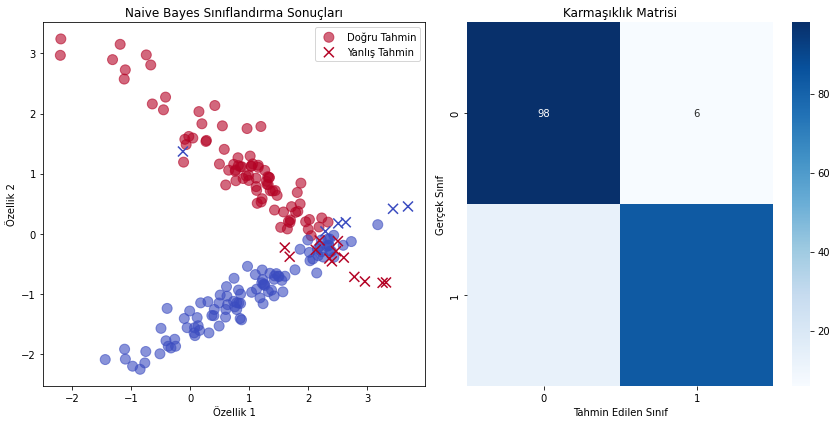


Sınıflandırma Raporu:
              precision    recall  f1-score   support

     Sınıf 0       0.88      0.94      0.91       104
     Sınıf 1       0.93      0.86      0.90        96

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200


Doğruluk Oranı: 0.91


In [12]:

plt.figure(figsize=(12, 6))

# Test verisi üzerinde doğru ve yanlış tahminleri gösterme
plt.subplot(121)
correct_mask = y_test == y_pred
incorrect_mask = y_test != y_pred

# Doğru tahminler
plt.scatter(X_test[correct_mask, 0], X_test[correct_mask, 1], 
           c=y_test[correct_mask], cmap='coolwarm', 
           marker='o', s=100, alpha=0.6, label='Doğru Tahmin')

# Yanlış tahminler
plt.scatter(X_test[incorrect_mask, 0], X_test[incorrect_mask, 1], 
           c=y_test[incorrect_mask], cmap='coolwarm', 
           marker='x', s=100, alpha=1, label='Yanlış Tahmin')

plt.title('Naive Bayes Sınıflandırma Sonuçları')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.legend()

# Confusion Matrix
plt.subplot(122)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')

plt.tight_layout()
plt.show()


print('\nSınıflandırma Raporu:')
print(classification_report(y_test, y_pred, target_names=['Sınıf 0', 'Sınıf 1']))

accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f'\nDoğruluk Oranı: {accuracy:.2f}')